<a href="https://colab.research.google.com/github/smoreira/LinearRegression/blob/master/RLSimples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#!pip install tensorflow --upgrade

import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt


2.0.0


Criando valores de X aleatórios

In [0]:
x = np.linspace(0,3,120)
y = 2 * x + 0.9 + np.random.randn(*x.shape) * 0.3

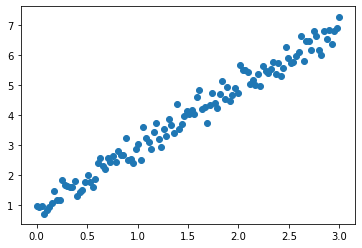

In [4]:
plt.scatter(x,y, label = "input data set")

In [0]:
class LinearModel:
  def __call__(self,x):
    return self.Weight * x + self.Bias
  
  def __init__(self):
    self.Weight = tf.Variable(11.0)
    self.Bias = tf.Variable(12.0)

In [0]:
def loss(y, pred):
  return tf.reduce_mean(tf.square(y - pred))

In [0]:
def train(linear_model, x, y, lr=0.12):
  with tf.GradientTape() as t:
    current_loss = loss(y, linear_model(x))

  lr_weight, lr_bias = t.gradient(current_loss, [linear_model.Weight, linear_model.Bias])
  linear_model.Weight.assign_sub(lr * lr_weight)
  linear_model.Bias.assign_sub(lr * lr_bias)

In [13]:
linear_model = LinearModel()
Weight, Bias = [], []

epochs = 80

for epoch_cont in range(epochs):
  Weight.append(linear_model.Weight.numpy())
  Bias.append(linear_model.Bias.numpy())
  real_loss = loss(y, linear_model(x))
  train(linear_model, x, y, lr=0.12)
  print(f"Epoch count {epoch_cont}: Loss Value: { real_loss.numpy()}")

Epoch count 0: Loss Value: 665.2864379882812
Epoch count 1: Loss Value: 10.464156150817871
Epoch count 2: Loss Value: 5.212378025054932
Epoch count 3: Loss Value: 4.7005743980407715
Epoch count 4: Loss Value: 4.267405033111572
Epoch count 5: Loss Value: 3.875048875808716
Epoch count 6: Loss Value: 3.519460916519165
Epoch count 7: Loss Value: 3.1971933841705322
Epoch count 8: Loss Value: 2.9051244258880615
Epoch count 9: Loss Value: 2.6404237747192383
Epoch count 10: Loss Value: 2.4005279541015625
Epoch count 11: Loss Value: 2.183112382888794
Epoch count 12: Loss Value: 1.9860694408416748
Epoch count 13: Loss Value: 1.8074910640716553
Epoch count 14: Loss Value: 1.645646572113037
Epoch count 15: Loss Value: 1.4989678859710693
Epoch count 16: Loss Value: 1.366033911705017
Epoch count 17: Loss Value: 1.2455569505691528
Epoch count 18: Loss Value: 1.1363693475723267
Epoch count 19: Loss Value: 1.0374133586883545
Epoch count 20: Loss Value: 0.9477301836013794
Epoch count 21: Loss Value: 0.8

In [14]:
linear_model.Weight.numpy(), linear_model.Bias.numpy()

(1.9695069, 0.99424905)

In [0]:
RMSE = loss(y,linear_model(x))

In [16]:
RMSE.numpy()

0.08271823